In [122]:
#Install packages
# !pip install sodapy
# !pip install geopandas
# !pip install contextily
# !pip install folium
# !pip install streamlit
# !pip install ydata_profiling

In [123]:
#Import relevant packages
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import numpy as np
import shapely
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import contextily as ctx
import folium
from folium.plugins import MarkerCluster, HeatMap
import streamlit as st


## HW 1

In [124]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("pnau-cf66", limit=2000)
results_df = pd.DataFrame.from_records(results)


In [125]:
results_df

,link,description
0,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing bus garage and facilit...
1,{'url': 'https://data.cityofchicago.org/Transp...,Line data representing CTA bus routes. To view...
2,{'url': 'https://data.cityofchicago.org/Transp...,"Point data representing over 11,000 CTA bus st..."
3,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing locations of all bus t...
4,{'url': 'http://data.cityofchicago.org/dataset...,Point data representing sites that sell/vend C...
5,{'url': 'https://data.cityofchicago.org/Transp...,Lines representing approximately where the CTA...
6,{'url': 'https://data.cityofchicago.org/Transp...,Points representing CTA Rail Stations. To view...
7,{'url': 'https://data.cityofchicago.org/Transp...,Point data representing CTA park and ride loca...
8,{'url': 'http://data.cityofchicago.org/dataset...,This dataset gives annual ridership totals dat...
9,{'url': 'http://data.cityofchicago.org/dataset...,This dataset shows total daily ridership on a ...


In [126]:
bus_stops_geo = gpd.read_file("https://data.cityofchicago.org/resource/6uva-a5ei.geojson")

In [127]:
bus_stops_geo

,name,sun,wkday,route,sat,geometry
0,ROOSEVELT,True,True,12,True,"MULTILINESTRING ((-87.64791 41.86713, -87.6474..."
1,UNION/STREETERVILLE EXPRESS,False,True,121,False,"MULTILINESTRING ((-87.6245 41.88833, -87.62493..."
2,BRONZEVILLE/UNION STATION,False,True,1,False,"MULTILINESTRING ((-87.62326 41.83103, -87.6232..."
3,HALSTED/95TH,False,True,108,False,"MULTILINESTRING ((-87.59053 41.65577, -87.5906..."
4,LINCOLN,True,True,11,True,"MULTILINESTRING ((-87.68883 41.96676, -87.6888..."
...,...,...,...,...,...,...
122,OGILVIE/STREETERVILLE EXPRESS,False,True,120,False,"MULTILINESTRING ((-87.6245 41.88833, -87.62493..."
123,JACKSON,True,True,126,True,"MULTILINESTRING ((-87.7739 41.87647, -87.7739 ..."
124,MADISON,True,True,20,True,"MULTILINESTRING ((-87.77391 41.88008, -87.7731..."
125,SOLDIER FIELD EXPRESS,False,False,128,False,"MULTILINESTRING ((-87.61699 41.86502, -87.6153..."


In [128]:
route = 121
route = str(route)
m = folium.Map([41.85, -87.6])

# Correct the filtering condition
folium.GeoJson(bus_stops_geo[bus_stops_geo['route'] == route]).add_to(m)
#Add a tooltip to the bus stops

m

### Import Datasets

In [129]:
#Establish date range for analysis
start_date = "2016-01-01T00:00:00"
end_date = "2024-12-31T23:59:59"


In [130]:
#For bus ridership, use "date" as the date field
bus_ridership = client.get("jyb9-n7fm", where=f"date between '{start_date}' and '{end_date}'",limit=1000000)
bus_ridership_df = pd.DataFrame.from_records(bus_ridership)

#For train ridership, use "date" as the date field
train_ridership = client.get("5neh-572f", where=f"date between '{start_date}' and '{end_date}'",limit=1000000)
train_ridership_df = pd.DataFrame.from_records(train_ridership)

#For traffic crashes, use "crash_date" as the date field
traffic_crashes = client.get("85ca-t3if", where=f"Crash_Date between '{start_date}' and '{end_date}'", limit=1000000)
traffic_crashes_df = pd.DataFrame.from_records(traffic_crashes)

In [131]:
#For Bus Stops
bus_stops_df = pd.read_csv('Data/CTA_BusStops.csv')
bus_stops_df

,the_geom,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM
0,POINT (-87.74750923800002 41.956892084),15189,CICERO,BERTEAU (north leg),SB,FS,"54,54A",NaN,CHICAGO,Cicero & Berteau
1,POINT (-87.64178572600002 41.67799153599998),14545,HALSTED,119TH STREET,NB,FS,"8A,108",NaN,CHICAGO,Halsted & 119th Street
2,POINT (-87.70896851700002 42.012049691000016),15046,KEDZIE,TOUHY,NB,FS,11,NaN,CHICAGO,Kedzie & Touhy
3,POINT (-87.66891603599998 41.954186386),6280,ASHLAND,IRVING PARK,NB,NS,"9,X9",NaN,CHICAGO,Ashland & Irving Park
4,POINT (-87.67517869800002 41.83201446999999),4484,ARCHER,DAMEN,SWB,NS,62,N62,CHICAGO,Archer & Damen
...,...,...,...,...,...,...,...,...,...,...
10755,POINT (-87.69960900000001 42.02665914200003),14738,DODGE,OAKTON,SB,NS,93,NaN,EVANSTON,Dodge & Oakton
10756,POINT (-87.714284169 41.933375263000016),5563,MILWAUKEE,WISNER,NWB,NS,56,NaN,CHICAGO,Milwaukee & Wisner
10757,POINT (-87.81891211099997 42.00458322200001),9910,NORTHWEST HWY,OVERHILL,NWB,FS,68,NaN,CHICAGO,Northwest Hwy & Overhill
10758,POINT (-87.67733964000001 42.053723761000015),17295,SHERIDAN,FOSTER,SB,FS,201,NaN,EVANSTON,Sheridan & Foster


In [132]:
display(bus_ridership_df.head())
display(train_ridership_df.head())
display(traffic_crashes_df.head())
display(bus_stops_df.head())

,route,date,daytype,rides
0,67,2016-01-01T00:00:00.000,U,5497
1,76,2016-01-01T00:00:00.000,U,3190
2,47,2016-01-01T00:00:00.000,U,4007
3,X49,2016-01-01T00:00:00.000,U,48
4,63W,2016-01-01T00:00:00.000,U,309


,station_id,stationname,date,daytype,rides
0,40050,Davis,2016-01-01T00:00:00.000,U,1415
1,41200,Argyle,2016-01-01T00:00:00.000,U,1741
2,40970,Cicero-Forest Park,2016-01-01T00:00:00.000,U,722
3,40490,Grand/Milwaukee,2016-01-01T00:00:00.000,U,1700
4,41130,Halsted-Orange,2016-01-01T00:00:00.000,U,764


,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,hit_and_run_i,statements_taken_i,photos_taken_i,lane_cnt,crash_date_est_i,private_property_i,dooring_i,work_zone_i,work_zone_type,workers_present_i
0,8a82d14f6d2d392638a8c5f5bdaee89ce8c42005c4529c...,2024-12-31T23:47:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,CENTER TURN LANE,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cc89da2a2705cf16fbe17bafd4205fad11bc3853956f41...,2024-12-31T23:41:00.000,30,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ONE-WAY,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3b32c74ced97162dcb27f4cab0e9b3beb389e6548608b7...,2024-12-31T23:30:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,UNKNOWN,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783c000fe66fb73635b07ba9490bd2de72dc1339a96ad6...,2024-12-31T23:18:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07aea53a5f52a70521c0738eedb5821a1746b7b996a6ff...,2024-12-31T23:00:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,the_geom,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM
0,POINT (-87.74750923800002 41.956892084),15189,CICERO,BERTEAU (north leg),SB,FS,"54,54A",NaN,CHICAGO,Cicero & Berteau
1,POINT (-87.64178572600002 41.67799153599998),14545,HALSTED,119TH STREET,NB,FS,"8A,108",NaN,CHICAGO,Halsted & 119th Street
2,POINT (-87.70896851700002 42.012049691000016),15046,KEDZIE,TOUHY,NB,FS,11,NaN,CHICAGO,Kedzie & Touhy
3,POINT (-87.66891603599998 41.954186386),6280,ASHLAND,IRVING PARK,NB,NS,"9,X9",NaN,CHICAGO,Ashland & Irving Park
4,POINT (-87.67517869800002 41.83201446999999),4484,ARCHER,DAMEN,SWB,NS,62,N62,CHICAGO,Archer & Damen


In [133]:
traffic_crashes_df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,hit_and_run_i,statements_taken_i,photos_taken_i,lane_cnt,crash_date_est_i,private_property_i,dooring_i,work_zone_i,work_zone_type,workers_present_i
0,8a82d14f6d2d392638a8c5f5bdaee89ce8c42005c4529c...,2024-12-31T23:47:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,CENTER TURN LANE,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cc89da2a2705cf16fbe17bafd4205fad11bc3853956f41...,2024-12-31T23:41:00.000,30,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ONE-WAY,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3b32c74ced97162dcb27f4cab0e9b3beb389e6548608b7...,2024-12-31T23:30:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,UNKNOWN,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783c000fe66fb73635b07ba9490bd2de72dc1339a96ad6...,2024-12-31T23:18:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07aea53a5f52a70521c0738eedb5821a1746b7b996a6ff...,2024-12-31T23:00:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,STRAIGHT AND LEVEL,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896848,cab96302f20a40a075d0e86a74420e3b4c961f4ee9aea3...,2016-01-01T00:55:00.000,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
896849,fb93a3d576a12edcc3417852db9b84f6ee381e5ce1da19...,2016-01-01T00:36:00.000,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,Y,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
896850,bd8e756c4d107f5d27745361d3cfc798754265ce3eec91...,2016-01-01T00:15:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
896851,95b4209caff8b163a9a24c16cffff429fa7649e21b3acf...,2016-01-01T00:08:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#Print the shape of the datasets
print("Bus Ridership DataFrame shape:", bus_ridership_df.shape)
print("Train Ridership DataFrame shape:", train_ridership_df.shape)
print("Traffic Crashes DataFrame shape:", traffic_crashes_df.shape)
print("Bus Stops DataFrame shape:", bus_stops_df.shape)

Bus Ridership DataFrame shape: (377544, 4)
Train Ridership DataFrame shape: (471649, 5)
Traffic Crashes DataFrame shape: (896853, 48)
Bus Stops DataFrame shape: (10760, 10)


## HW 2

In [135]:
import pandas as pd
from sodapy import Socrata
from ydata_profiling import ProfileReport 
from datetime import datetime

# Convert date fields
bus_ridership_df['date'] = pd.to_datetime(bus_ridership_df['date'])
train_ridership_df['date'] = pd.to_datetime(train_ridership_df['date'])
traffic_crashes_df['crash_date'] = pd.to_datetime(traffic_crashes_df['crash_date'])

# Optional: Filter columns for performance before profiling
bus_subset = bus_ridership_df[['date', 'route', 'rides']].copy()
train_subset = train_ridership_df[['date', 'station_id', 'stationname', 'rides']].copy()
crash_subset = traffic_crashes_df[['crash_date', 'latitude', 'longitude', 'crash_type']].copy()

# # Create profile reports
# bus_profile = ProfileReport(bus_subset, title="Bus Ridership Profile", explorative=True)
# train_profile = ProfileReport(train_subset, title="Train Ridership Profile", explorative=True)
# crash_profile = ProfileReport(crash_subset, title="Traffic Crashes Profile", explorative=True)

# # Save to HTML
# bus_profile.to_file("bus_ridership_profile.html")
# train_profile.to_file("train_ridership_profile.html")
# crash_profile.to_file("traffic_crashes_profile.html")


In [136]:
#Count null values in each column
print("Bus Ridership Null Values:")
print(bus_ridership_df.isnull().sum())
print("\nTrain Ridership Null Values:")
print(train_ridership_df.isnull().sum())
print("\nTraffic Crashes Null Values:")
print(traffic_crashes_df.isnull().sum())
print("\nBus Stops Null Values:")
print(bus_stops_df.isnull().sum())



Bus Ridership Null Values:
route      0
date       0
daytype    0
rides      0
dtype: int64

Train Ridership Null Values:
station_id     0
stationname    0
date           0
daytype        0
rides          0
dtype: int64

Traffic Crashes Null Values:
crash_record_id                       0
crash_date                            0
posted_speed_limit                    0
traffic_control_device                0
device_condition                      0
weather_condition                     0
lighting_condition                    0
first_crash_type                      0
trafficway_type                       0
alignment                             0
roadway_surface_cond                  0
road_defect                           0
report_type                       28456
crash_type                            0
intersection_related_i           690413
damage                                0
date_police_notified                  0
prim_contributory_cause               0
sec_contributory_cause        

In [137]:
#Display rows of the crash data where latitude or longitude is null
null_lat_long =traffic_crashes_df[crash_subset['latitude'].isnull() | crash_subset['longitude'].isnull()]
null_lat_long

#Count the unique dates in the crash data trimmed of the time data
# Convert crash_date to datetime if not already done
traffic_crashes_df['crash_date'] = pd.to_datetime(traffic_crashes_df['crash_date'])
# Extract the date part
traffic_crashes_df['crash_date'] = traffic_crashes_df['crash_date'].dt.date
# Count unique dates
unique_dates = traffic_crashes_df['crash_date'].nunique()
unique_dates

3288

In [138]:
#Drop rows with null values in latitude or longitude for traffic crashes
traffic_crashes_df = traffic_crashes_df.dropna(subset=['latitude', 'longitude'])

In [139]:
#Fill the missing values in the crash data with zeroes
traffic_crashes_df = traffic_crashes_df.fillna(0)

In [140]:
#Modify the bus stops to use latitude and longitude
bus_stops_df[['longitude', 'latitude']] = (
    bus_stops_df['the_geom']
    .str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')
    .astype(float)
)

#Check result
bus_stops_df.head()

#Fill null values in OWLROUTES
bus_stops_df['OWLROUTES'] = bus_stops_df['OWLROUTES'].fillna('N/A')


In [141]:
#Display the rows where CITY is null
display(bus_stops_df[bus_stops_df['CITY'].isnull()])


,the_geom,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM,longitude,latitude
10382,POINT (-87.611098406 41.89265401199998),18620,NAVY PIER,TERMINAL,NEB,TERM,2,N/A,NaN,Navy Pier Terminal,-87.611098,41.892654


In [142]:
#Fill the missing value with 'Chicago'
bus_stops_df['CITY'] = bus_stops_df['CITY'].fillna('Chicago')

In [143]:
#Display the rows where CITY is null again to confirm the change
display(bus_stops_df[bus_stops_df['CITY'].isnull()])

,the_geom,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM,longitude,latitude


In [144]:
#Parse the bus stop routes
bus_stops = bus_stops_df[['ROUTESSTPG', 'latitude', 'longitude']].dropna()
bus_stops['ROUTESSTPG'] = bus_stops['ROUTESSTPG'].str.split(',')
bus_stops = bus_stops.explode('ROUTESSTPG')
bus_stops['route'] = bus_stops['ROUTESSTPG'].str.strip()
bus_stops = bus_stops[['route', 'latitude', 'longitude']].dropna().drop_duplicates()
#Drop where route is empty
bus_stops = bus_stops[~bus_stops['route'].str.contains('^$')]
#Sort by route
bus_stops = bus_stops.sort_values(by='route').reset_index(drop=True)


In [145]:
bus_stops

,route,latitude,longitude
0,1,41.875540,-87.624126
1,1,41.853186,-87.623709
2,1,41.870503,-87.624006
3,1,41.878121,-87.629467
4,1,41.879575,-87.625884
...,...,...,...
13991,X9,41.728540,-87.662976
13992,X9,41.721483,-87.662543
13993,X9,41.815921,-87.665233
13994,X98,42.054878,-87.797903


### Data Manipulation

In [146]:
from sklearn.neighbors import BallTree
#Prepare traffic crash data
crashes = traffic_crashes_df[['crash_date', 'latitude', 'longitude']].dropna().copy()
crashes.rename(columns={'crash_date': 'date'}, inplace=True)
crashes['date'] = pd.to_datetime(crashes['date']).dt.date
crashes['latitude'] = pd.to_numeric(crashes['latitude'])
crashes['longitude'] = pd.to_numeric(crashes['longitude'])

In [147]:
#Convert coordinates to radians
stop_coords = np.radians(bus_stops[['latitude', 'longitude']].astype(float))
#Convert crash coordinates to radians
crash_coords = np.radians(crashes[['latitude', 'longitude']].astype(float))
#Use BallTree to find nearest bus stop for each crash
tree = BallTree(stop_coords, metric='haversine')
distances, indices = tree.query(crash_coords, k=1)

In [148]:
#Map nearest route to crash if within 0.2 miles (≈ 2 city blocks)
crashes['nearest_route'] = bus_stops.iloc[indices.flatten()].route.values
crashes['nearest_stop_index'] = indices.flatten()
crashes['distance_miles'] = distances.flatten() * 3958.8
crashes = crashes[crashes['distance_miles'] <= 0.2]

In [149]:
#Display Crashes
crashes

,date,latitude,longitude,nearest_route,nearest_stop_index,distance_miles
0,2024-12-31,41.722380,-87.575207,15,1956,0.004091
1,2024-12-31,41.891133,-87.619160,124,1094,0.051143
2,2024-12-31,41.886703,-87.624114,147,1716,0.013916
3,2024-12-31,41.736786,-87.601330,87,11949,0.004260
5,2024-12-31,41.902547,-87.740801,70,9374,0.045077
...,...,...,...,...,...,...
896848,2016-01-01,41.883801,-87.647566,8,10787,0.002855
896849,2016-01-01,41.772537,-87.586445,28,3920,0.024078
896850,2016-01-01,41.891659,-87.622204,120,1062,0.020091
896851,2016-01-01,41.928172,-87.652791,74,9898,0.187667


In [150]:
bus_stops_df

,the_geom,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM,longitude,latitude
0,POINT (-87.74750923800002 41.956892084),15189,CICERO,BERTEAU (north leg),SB,FS,"54,54A",N/A,CHICAGO,Cicero & Berteau,-87.747509,41.956892
1,POINT (-87.64178572600002 41.67799153599998),14545,HALSTED,119TH STREET,NB,FS,"8A,108",N/A,CHICAGO,Halsted & 119th Street,-87.641786,41.677992
2,POINT (-87.70896851700002 42.012049691000016),15046,KEDZIE,TOUHY,NB,FS,11,N/A,CHICAGO,Kedzie & Touhy,-87.708969,42.012050
3,POINT (-87.66891603599998 41.954186386),6280,ASHLAND,IRVING PARK,NB,NS,"9,X9",N/A,CHICAGO,Ashland & Irving Park,-87.668916,41.954186
4,POINT (-87.67517869800002 41.83201446999999),4484,ARCHER,DAMEN,SWB,NS,62,N62,CHICAGO,Archer & Damen,-87.675179,41.832014
...,...,...,...,...,...,...,...,...,...,...,...,...
10755,POINT (-87.69960900000001 42.02665914200003),14738,DODGE,OAKTON,SB,NS,93,N/A,EVANSTON,Dodge & Oakton,-87.699609,42.026659
10756,POINT (-87.714284169 41.933375263000016),5563,MILWAUKEE,WISNER,NWB,NS,56,N/A,CHICAGO,Milwaukee & Wisner,-87.714284,41.933375
10757,POINT (-87.81891211099997 42.00458322200001),9910,NORTHWEST HWY,OVERHILL,NWB,FS,68,N/A,CHICAGO,Northwest Hwy & Overhill,-87.818912,42.004583
10758,POINT (-87.67733964000001 42.053723761000015),17295,SHERIDAN,FOSTER,SB,FS,201,N/A,EVANSTON,Sheridan & Foster,-87.677340,42.053724


In [151]:
bus_stop_locations = bus_stops.copy()

In [152]:
bus_stop_locations

,route,latitude,longitude
0,1,41.875540,-87.624126
1,1,41.853186,-87.623709
2,1,41.870503,-87.624006
3,1,41.878121,-87.629467
4,1,41.879575,-87.625884
...,...,...,...
13991,X9,41.728540,-87.662976
13992,X9,41.721483,-87.662543
13993,X9,41.815921,-87.665233
13994,X98,42.054878,-87.797903


In [153]:
bus_stop_locations = bus_stop_locations.rename(columns={'latitude': 'stop_lat', 'longitude': 'stop_lon'})
bus_stops_locations = bus_stop_locations[['route', 'stop_lat', 'stop_lon']].drop_duplicates()

In [154]:
bus_stop_locations['stop_index'] = bus_stop_locations.index
bus_stop_locations['stop_index'] = bus_stop_locations['stop_index'].astype(str)

In [155]:
#Add the geographic coordinates to the bus stops
crashes['nearest_stop_index'] = crashes['nearest_stop_index'].astype(str)
crashes_with_stops = pd.merge(crashes, bus_stop_locations, left_on='nearest_stop_index', right_on='stop_index', how='left')

In [156]:
crashes_with_stops.head()

,date,latitude,longitude,nearest_route,nearest_stop_index,distance_miles,route,stop_lat,stop_lon,stop_index
0,2024-12-31,41.722380,-87.575207,15,1956,0.004091,15,41.722349,-87.575275,1956
1,2024-12-31,41.891133,-87.619160,124,1094,0.051143,124,41.890852,-87.620080,1094
2,2024-12-31,41.886703,-87.624114,147,1716,0.013916,147,41.886700,-87.624384,1716
3,2024-12-31,41.736786,-87.601330,87,11949,0.004260,87,41.736762,-87.601405,11949
4,2024-12-31,41.902547,-87.740801,70,9374,0.045077,70,41.902414,-87.739943,9374


In [157]:
crashes_with_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830701 entries, 0 to 830700
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                830701 non-null  object 
 1   latitude            830701 non-null  float64
 2   longitude           830701 non-null  float64
 3   nearest_route       830701 non-null  object 
 4   nearest_stop_index  830701 non-null  object 
 5   distance_miles      830701 non-null  float64
 6   route               830701 non-null  object 
 7   stop_lat            830701 non-null  float64
 8   stop_lon            830701 non-null  float64
 9   stop_index          830701 non-null  object 
dtypes: float64(5), object(5)
memory usage: 63.4+ MB


In [158]:
#Aggregate crash counts per route-date
crash_counts = crashes.groupby(['date', 'nearest_route']).size().reset_index(name='crash_count')
crash_counts.rename(columns={'nearest_route': 'route'}, inplace=True)

In [159]:
#Prepare bus ridership data
bus_ridership_df['date'] = pd.to_datetime(bus_ridership_df['date']).dt.date
bus_ridership_df['rides'] = pd.to_numeric(bus_ridership_df['rides'], errors='coerce')
bus_ridership_df.dropna(subset=['rides'], inplace=True)
bus_ridership_df['route'] = bus_ridership_df['route'].astype(str)

In [160]:
#Merge bus ridership with crash counts
bus_crash_merged = pd.merge(bus_ridership_df, crash_counts, how='left', on=['date', 'route'])
bus_crash_merged['crash_count'] = bus_crash_merged['crash_count'].fillna(0).astype(int)

# Preview result
bus_crash_merged.head()

,route,date,daytype,rides,crash_count
0,67,2016-01-01,U,5497,0
1,76,2016-01-01,U,3190,2
2,47,2016-01-01,U,4007,1
3,X49,2016-01-01,U,48,1
4,63W,2016-01-01,U,309,0


In [161]:
#Display the shape of the merged data
bus_crash_merged.shape

(377544, 5)

In [162]:
bus_crash_merged.columns

Index(['route', 'date', 'daytype', 'rides', 'crash_count'], dtype='object')

In [163]:
#Add columns for day, month, and year
#Convert date back to pandas datetime type first
bus_crash_merged['date'] = pd.to_datetime(bus_crash_merged['date'])
bus_crash_merged['day'] = bus_crash_merged['date'].dt.day
bus_crash_merged['month'] = bus_crash_merged['date'].dt.month
bus_crash_merged['year'] = bus_crash_merged['date'].dt.year
bus_crash_merged['date'] = pd.to_datetime(bus_crash_merged['date']).dt.date

In [164]:
#Display summary statistics for each route in the merged data
route_summary_stats = bus_crash_merged.groupby('route').agg(
    total_rides=('rides', 'sum'),
    total_crashes=('crash_count', 'sum'),
    average_rides=('rides', 'mean'),
    average_crashes=('crash_count', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min'),
    max_crashes=('crash_count', 'max'),
    min_crashes=('crash_count', 'min'),
).reset_index()
route_summary_stats

,route,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,1,2650936,1698,1149.083658,0.736021,2499,1,5,0
1,10,432310,1085,508.600000,1.276471,1210,2,8,0
2,100,1009670,3728,440.327082,1.625818,3592,31,8,0
3,1001,1224350,0,381.893325,0.000000,27202,0,0,0
4,103,4404228,4487,1339.485401,1.364659,4621,89,9,0
...,...,...,...,...,...,...,...,...,...
134,J14,20885494,2053,6352.035888,0.624392,15107,544,5,0
135,X4,1422262,0,2362.561462,0.000000,3943,202,0,0
136,X49,11052213,3495,4809.492167,1.520888,8490,48,7,0
137,X9,13940726,1606,6071.744774,0.699477,10256,12,6,0


In [178]:
#Display the highest and lowest average ridership by routes
highest_ridership = route_summary_stats.nlargest(11, 'average_rides')
display(highest_ridership)
lowest_ridership = route_summary_stats.nsmallest(10, 'average_rides')
display(lowest_ridership)

,route,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
108,79,52509986,13226,15970.190389,4.022506,30131,3796,15,0
95,66,48313602,12051,14693.917883,3.665146,24870,1498,18,0
121,9,44292030,21438,13470.812044,6.520073,22254,3040,20,0
109,8,43516351,15514,13234.899939,4.718370,25537,1364,18,0
106,77,42567100,12958,12946.198297,3.940998,23215,1444,15,0
63,4,41599005,11101,12651.765511,3.376217,23635,2229,13,0
75,53,40603741,15873,12349.069647,4.827555,22044,2767,15,0
50,22,38508446,14332,11711.814477,4.358881,18757,1231,22,0
68,49,38137537,18651,11599.007603,5.672445,18854,2049,19,0
55,3,37034713,10869,11263.598844,3.305657,21425,1565,13,0


,route,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
132,992,12,0,1.090909,0.000000,3,0,0,0
133,999,3,0,1.500000,0.000000,2,1,0,0
92,642,121,0,4.321429,0.000000,8,1,0,0
32,154,69,0,11.500000,0.000000,37,2,0,0
138,X98,21112,0,13.048208,0.000000,52,0,0,0
37,169,283995,971,111.501767,0.381233,419,0,5,0
36,165,323844,1400,141.170009,0.610288,354,6,6,0
42,19,160541,132,177.002205,0.145535,1825,0,3,0
9,111A,585645,1698,178.115876,0.516423,1018,8,5,0
81,55A,474585,886,206.880994,0.386225,467,7,5,0


In [165]:
#Display the highest and lowest average crashes by routes
highest_ridership = route_summary_stats.nlargest(10, 'average_crashes')
display(highest_ridership)
lowest_ridership = route_summary_stats.nsmallest(10, 'average_crashes')
display(lowest_ridership)

,route,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
121,9,44292030,21438,13470.812044,6.520073,22254,3040,20,0
68,49,38137537,18651,11599.007603,5.672445,18854,2049,19,0
75,53,40603741,15873,12349.069647,4.827555,22044,2767,15,0
109,8,43516351,15514,13234.899939,4.718370,25537,1364,18,0
126,94,20448534,14848,6219.140511,4.515815,11572,819,16,0
50,22,38508446,14332,11711.814477,4.358881,18757,1231,22,0
76,53A,15368620,13597,4674.154501,4.135341,10623,390,15,0
103,74,26256667,13335,7985.604319,4.055657,13894,839,15,0
101,72,32223479,13330,9800.328163,4.054136,17470,1493,15,0
45,20,34502745,13251,10493.535584,4.030109,20366,1939,15,0


,route,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
3,1001,1224350,0,381.893325,0.0,27202,0,0,0
19,128,42097,0,610.101449,0.0,2369,1,0,0
21,132,177951,0,236.009284,0.0,350,29,0,0
32,154,69,0,11.500000,0.0,37,2,0,0
38,170,33679,0,314.757009,0.0,625,13,0,0
47,205,565451,0,830.324523,0.0,1194,302,0,0
70,5,1002786,0,305.076361,0.0,1245,21,0,0
92,642,121,0,4.321429,0.0,8,1,0,0
93,643,90092,0,1201.226667,0.0,3345,3,0,0
128,95E,754327,0,3041.641129,0.0,4193,103,0,0


In [166]:
#Display summary statistics for each daytype in the merged data
daytype_bus_summary_stats = bus_crash_merged.groupby('daytype').agg(
    total_rides=('rides', 'sum'),
    total_crashes=('crash_count', 'sum'),
    average_rides=('rides', 'mean'),
    average_crashes=('crash_count', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min'),
    max_crashes=('crash_count', 'max'),
    min_crashes=('crash_count', 'min'),
).reset_index()
daytype_bus_summary_stats

,daytype,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,A,177237680,105310,4006.095565,2.380317,20382,0,19,0
1,U,146084118,94910,3202.896689,2.080903,27202,0,16,0
2,W,1375514374,585437,4781.204809,2.034944,30131,0,22,0


In [167]:
#Display summary statistics for each date in the merged data
date_bus_summary_stats = bus_crash_merged.groupby('date').agg(
    total_rides=('rides', 'sum'),
    total_crashes=('crash_count', 'sum'),
    average_rides=('rides', 'mean'),
    average_crashes=('crash_count', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min'),
    max_crashes=('crash_count', 'max'),
    min_crashes=('crash_count', 'min'),
).reset_index()
date_bus_summary_stats

,date,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,2016-01-01,290483,56,3227.588889,0.622222,12614,17,5,0
1,2016-01-02,392374,65,4087.229167,0.677083,12537,50,4,0
2,2016-01-03,338714,49,3805.775281,0.550562,13659,117,4,0
3,2016-01-04,826022,83,6555.730159,0.658730,26868,11,4,0
4,2016-01-05,844320,90,6648.188976,0.708661,26647,9,4,0
...,...,...,...,...,...,...,...,...,...
3283,2024-12-27,392636,256,3166.419355,2.064516,12532,38,10,0
3284,2024-12-28,346462,174,3725.397849,1.870968,13641,67,7,0
3285,2024-12-29,229235,141,2665.523256,1.639535,8578,150,5,0
3286,2024-12-30,444589,224,3585.395161,1.806452,13975,53,9,0


In [168]:
#Display the highest and lowest ridership routes
highest_ridership = date_bus_summary_stats.nlargest(5, 'total_rides')
display(highest_ridership)
lowest_ridership = date_bus_summary_stats.nsmallest(5, 'total_rides')
display(lowest_ridership)

,date,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
305,2016-11-01,928381,157,7310.086614,1.236220,29283,17,6,0
31,2016-02-01,922805,73,7382.440000,0.584000,29286,132,4,0
33,2016-02-03,921039,60,7309.833333,0.476190,30131,3,4,0
641,2017-10-03,917641,324,7282.865079,2.571429,27736,17,9,0
307,2016-11-03,916950,172,7220.078740,1.354331,28843,18,8,0


,date,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
1820,2020-12-25,80199,143,932.546512,1.662791,4483,9,9,0
2550,2022-12-25,84255,172,979.709302,2.000000,3796,20,7,0
1612,2020-05-31,85753,244,997.127907,2.837209,4860,19,13,0
2185,2021-12-25,100918,137,1085.139785,1.473118,4411,5,6,0
1864,2021-02-07,109896,252,1277.860465,2.930233,5036,67,12,0


In [169]:
#Display summary statistics for each month in the merged data
month_bus_summary_stats = bus_crash_merged.groupby('month').agg(
    total_rides=('rides', 'sum'),
    total_crashes=('crash_count', 'sum'),
    average_rides=('rides', 'mean'),
    average_crashes=('crash_count', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min'),
    max_crashes=('crash_count', 'max'),
    min_crashes=('crash_count', 'min'),
).reset_index()
month_bus_summary_stats

,month,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,1,135823342,57689,4270.234288,1.813720,27450,0,15,0
1,2,138852055,57313,4720.932103,1.948626,30131,1,18,0
2,3,148317241,59463,4601.409766,1.844786,27909,1,16,0
3,4,135887575,58330,4382.904625,1.881370,28193,1,17,0
4,5,144602681,67696,4541.113620,2.125930,27924,0,17,0
5,6,138688186,68194,4417.806071,2.172268,28942,0,19,0
6,7,138046710,68724,4318.142888,2.149708,28009,1,17,0
7,8,143693910,70711,4411.577735,2.170914,25994,1,19,0
8,9,150050386,70621,4877.783824,2.295722,28651,1,20,0
9,10,155955412,73628,4855.550048,2.292350,29163,0,18,0


In [170]:
#Display the highest and lowest ridership routes
highest_ridership = month_bus_summary_stats.nlargest(5, 'average_crashes')
display(highest_ridership)
lowest_ridership = month_bus_summary_stats.nsmallest(5, 'average_crashes')
display(lowest_ridership)

,month,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
8,9,150050386,70621,4877.783824,2.295722,28651,1,20,0
9,10,155955412,73628,4855.550048,2.292350,29163,0,18,0
5,6,138688186,68194,4417.806071,2.172268,28942,0,19,0
7,8,143693910,70711,4411.577735,2.170914,25994,1,19,0
6,7,138046710,68724,4318.142888,2.149708,28009,1,17,0


,month,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,1,135823342,57689,4270.234288,1.813720,27450,0,15,0
2,3,148317241,59463,4601.409766,1.844786,27909,1,16,0
3,4,135887575,58330,4382.904625,1.881370,28193,1,17,0
1,2,138852055,57313,4720.932103,1.948626,30131,1,18,0
4,5,144602681,67696,4541.113620,2.125930,27924,0,17,0


In [171]:
#Display summary statistics for each year in the merged data
year_bus_summary_stats = bus_crash_merged.groupby('year').agg(
    total_rides=('rides', 'sum'),
    total_crashes=('crash_count', 'sum'),
    average_rides=('rides', 'mean'),
    average_crashes=('crash_count', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min'),
    max_crashes=('crash_count', 'max'),
    min_crashes=('crash_count', 'min'),
).reset_index()
year_bus_summary_stats

,year,total_rides,total_crashes,average_rides,average_crashes,max_rides,min_rides,max_crashes,min_crashes
0,2016,257917007,39079,6061.646737,0.918447,30131,0,12,0
1,2017,248107289,73994,5871.111219,1.750964,28220,0,18,0
2,2018,240995859,104850,5702.559310,2.481011,27676,1,19,0
3,2019,235636572,103001,5635.890265,2.463549,27202,1,22,0
4,2020,120379513,80697,2894.503667,1.940345,25391,0,18,0
5,2021,116379107,94871,2795.625814,2.278964,14440,1,18,0
6,2022,138741715,94414,3317.830428,2.257790,15827,0,18,0
7,2023,160232588,96764,3827.638144,2.311500,18192,1,20,0
8,2024,180446522,97987,4320.209778,2.345983,20660,1,19,0


## HW 3

In [172]:
crashes_with_stops

,date,latitude,longitude,nearest_route,nearest_stop_index,distance_miles,route,stop_lat,stop_lon,stop_index
0,2024-12-31,41.722380,-87.575207,15,1956,0.004091,15,41.722349,-87.575275,1956
1,2024-12-31,41.891133,-87.619160,124,1094,0.051143,124,41.890852,-87.620080,1094
2,2024-12-31,41.886703,-87.624114,147,1716,0.013916,147,41.886700,-87.624384,1716
3,2024-12-31,41.736786,-87.601330,87,11949,0.004260,87,41.736762,-87.601405,11949
4,2024-12-31,41.902547,-87.740801,70,9374,0.045077,70,41.902414,-87.739943,9374
...,...,...,...,...,...,...,...,...,...,...
830696,2016-01-01,41.883801,-87.647566,8,10787,0.002855,8,41.883797,-87.647510,10787
830697,2016-01-01,41.772537,-87.586445,28,3920,0.024078,28,41.772883,-87.586397,3920
830698,2016-01-01,41.891659,-87.622204,120,1062,0.020091,120,41.891824,-87.622526,1062
830699,2016-01-01,41.928172,-87.652791,74,9898,0.187667,74,41.925456,-87.652771,9898


### Visualization 1: Traffic Incidents and Bus Ridership

In [173]:
#Create a list of the top 10 routes with the highest average ridership
top_10_routes = route_summary_stats.nlargest(10, 'average_rides')['route'].tolist()
#Filter the crash count dataframes to include only the top 10 routes
top_10_crash_counts = crashes_with_stops[crashes_with_stops['nearest_route'].isin(top_10_routes)]

In [174]:
top_10_crash_counts.columns

Index(['date', 'latitude', 'longitude', 'nearest_route', 'nearest_stop_index',
       'distance_miles', 'route', 'stop_lat', 'stop_lon', 'stop_index'],
      dtype='object')

In [175]:
#Merge the average ridership data with the crash counts for the top 10 routes
top_10_ridership_crash = pd.merge(top_10_crash_counts, route_summary_stats[['route','total_rides','total_crashes','average_rides', 'average_crashes']], how='left',on='route')

In [176]:
top_10_ridership_crash

,date,latitude,longitude,nearest_route,nearest_stop_index,distance_miles,route,stop_lat,stop_lon,stop_index,total_rides,total_crashes,average_rides,average_crashes
0,2024-12-31,41.895898,-87.684202,66,8879,0.002643,66,41.895865,-87.684227,8879,48313602,12051,14693.917883,3.665146
1,2024-12-31,41.750527,-87.624389,79,10701,0.038313,79,41.750899,-87.624941,10701,52509986,13226,15970.190389,4.022506
2,2024-12-31,41.811250,-87.606098,4,5406,0.027747,4,41.811522,-87.606495,5406,41599005,11101,12651.765511,3.376217
3,2024-12-31,41.868017,-87.725393,53,6855,0.015252,53,41.867918,-87.725128,6855,40603741,15873,12349.069647,4.827555
4,2024-12-31,41.817199,-87.666240,9,12257,0.065580,9,41.817809,-87.665265,12257,44292030,21438,13470.812044,6.520073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146008,2016-01-01,41.938960,-87.708427,77,10276,0.039408,77,41.939265,-87.707779,10276,42567100,12958,12946.198297,3.940998
146009,2016-01-01,41.750918,-87.624690,79,10701,0.013000,79,41.750899,-87.624941,10701,52509986,13226,15970.190389,4.022506
146010,2016-01-01,41.939798,-87.654310,77,10352,0.049604,77,41.939967,-87.653372,10352,42567100,12958,12946.198297,3.940998
146011,2016-01-01,41.843308,-87.685502,49,6027,0.110802,49,41.844910,-87.685599,6027,38137537,18651,11599.007603,5.672445


In [112]:
top_10_crash_counts

,date,latitude,longitude,nearest_route,nearest_stop_index,distance_miles,route,stop_lat,stop_lon,stop_index
7,2024-12-31,41.895898,-87.684202,66,8879,0.002643,66,41.895865,-87.684227,8879
10,2024-12-31,41.750527,-87.624389,79,10701,0.038313,79,41.750899,-87.624941,10701
13,2024-12-31,41.811250,-87.606098,4,5406,0.027747,4,41.811522,-87.606495,5406
14,2024-12-31,41.868017,-87.725393,53,6855,0.015252,53,41.867918,-87.725128,6855
15,2024-12-31,41.817199,-87.666240,9,12257,0.065580,9,41.817809,-87.665265,12257
...,...,...,...,...,...,...,...,...,...,...
830659,2016-01-01,41.938960,-87.708427,77,10276,0.039408,77,41.939265,-87.707779,10276
830686,2016-01-01,41.750918,-87.624690,79,10701,0.013000,79,41.750899,-87.624941,10701
830688,2016-01-01,41.939798,-87.654310,77,10352,0.049604,77,41.939967,-87.653372,10352
830690,2016-01-01,41.843308,-87.685502,49,6027,0.110802,49,41.844910,-87.685599,6027


In [54]:
route = 121
route = str(route)
m = folium.Map([41.85, -87.6])

# Correct the filtering condition
folium.GeoJson(bus_stops_geo[bus_stops_geo['route'] == route]).add_to(m)

m

### Visualization 2: Daily Train Ridership vs Daily Bus Ridership

#### Prepare train ridership data

In [ ]:
#Display train ridership data
train_ridership_df.head()

,station_id,stationname,date,daytype,rides
0,40050,Davis,2016-01-01,U,1415
1,41200,Argyle,2016-01-01,U,1741
2,40970,Cicero-Forest Park,2016-01-01,U,722
3,40490,Grand/Milwaukee,2016-01-01,U,1700
4,41130,Halsted-Orange,2016-01-01,U,764


In [ ]:
#Convert date to datetime
train_ridership_df['date'] = pd.to_datetime(train_ridership_df['date'])
#Add columns for day, month, and year
train_ridership_df['day'] = train_ridership_df['date'].dt.day
train_ridership_df['month'] = train_ridership_df['date'].dt.month
train_ridership_df['year'] = train_ridership_df['date'].dt.year
#Convert date back to pandas datetime type first
train_ridership_df['date'] = pd.to_datetime(train_ridership_df['date']).dt.date
#Convert rides to numeric
train_ridership_df['rides'] = pd.to_numeric(train_ridership_df['rides'], errors='coerce')

In [ ]:
#Display train ridership data
train_ridership_df.head()

,station_id,stationname,date,daytype,rides,day,month,year
0,40050,Davis,2016-01-01,U,1415,1,1,2016
1,41200,Argyle,2016-01-01,U,1741,1,1,2016
2,40970,Cicero-Forest Park,2016-01-01,U,722,1,1,2016
3,40490,Grand/Milwaukee,2016-01-01,U,1700,1,1,2016
4,41130,Halsted-Orange,2016-01-01,U,764,1,1,2016


In [ ]:
#Calculate the daily train ridership
daily_train_ridership = train_ridership_df.groupby(['date']).agg(
    total_rides=('rides', 'sum'),
    average_rides=('rides', 'mean'),
    max_rides=('rides', 'max'),
    min_rides=('rides', 'min')
).reset_index()

In [ ]:
daily_train_ridership.head()

,date,total_rides,average_rides,max_rides,min_rides
0,2016-01-01,260039,1805.826389,13512,152
1,2016-01-02,293589,2038.812500,11515,0
2,2016-01-03,233880,1624.166667,9658,0
3,2016-01-04,575980,3999.861111,20050,0
4,2016-01-05,596073,4139.395833,20757,0


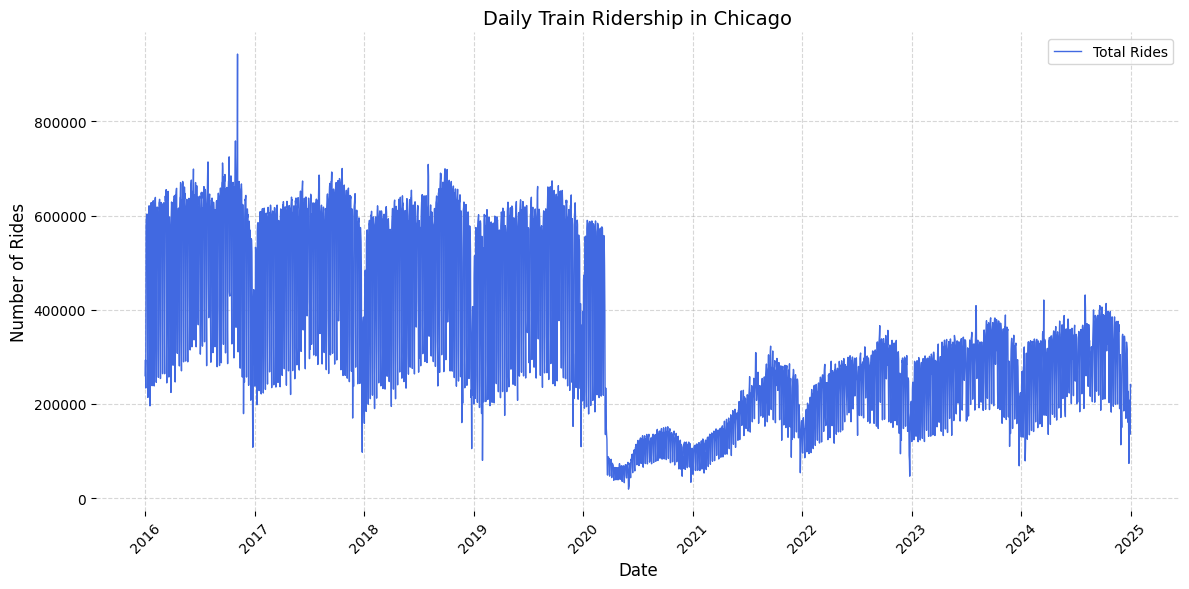

In [ ]:
#Set figure size
plt.figure(figsize=(12, 6))

plt.plot(daily_train_ridership['date'], 
        daily_train_ridership['total_rides'], 
        label='Total Rides', 
        color='royalblue', 
        linewidth=1)

#Axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Train Ridership in Chicago', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()



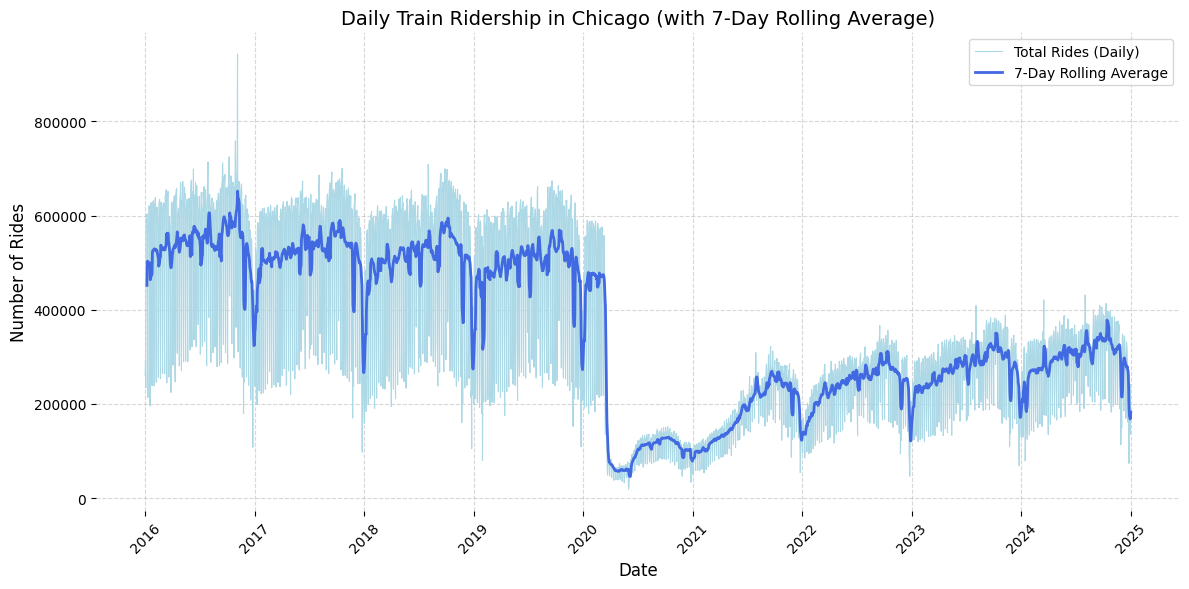

In [ ]:
#Compute 7-day rolling average
daily_train_ridership['rolling_avg'] = daily_train_ridership['total_rides'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))

#Plot original data (light line)
plt.plot(daily_train_ridership['date'], 
        daily_train_ridership['total_rides'], 
        label='Total Rides (Daily)', 
        color='lightblue', 
        linewidth=0.8)

#Plot rolling average (bold line)
plt.plot(daily_train_ridership['date'], 
        daily_train_ridership['rolling_avg'], 
        label='7-Day Rolling Average', 
        color='royalblue', 
        linewidth=2)

#Add axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Train Ridership in Chicago (with 7-Day Rolling Average)', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

for spine in plt.gca().spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


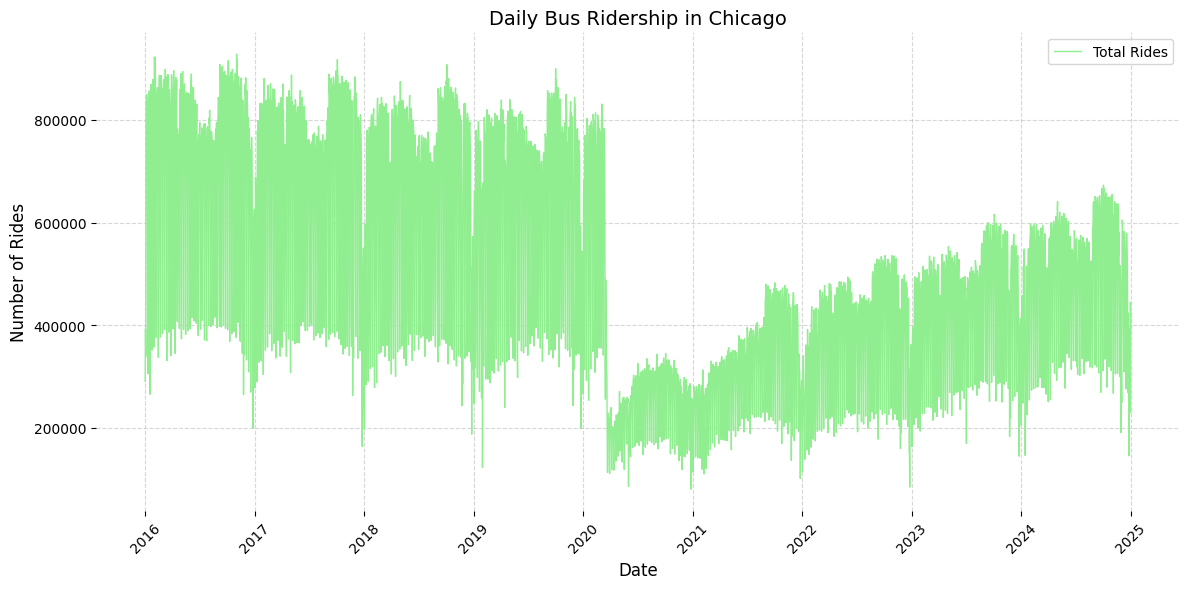

In [ ]:
#Plot daily bus ridership data

plt.figure(figsize=(12, 6))
plt.plot(date_bus_summary_stats['date'], 
        date_bus_summary_stats['total_rides'], 
        label='Total Rides', 
        color='lightgreen', 
        linewidth=1)

#Axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Bus Ridership in Chicago', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


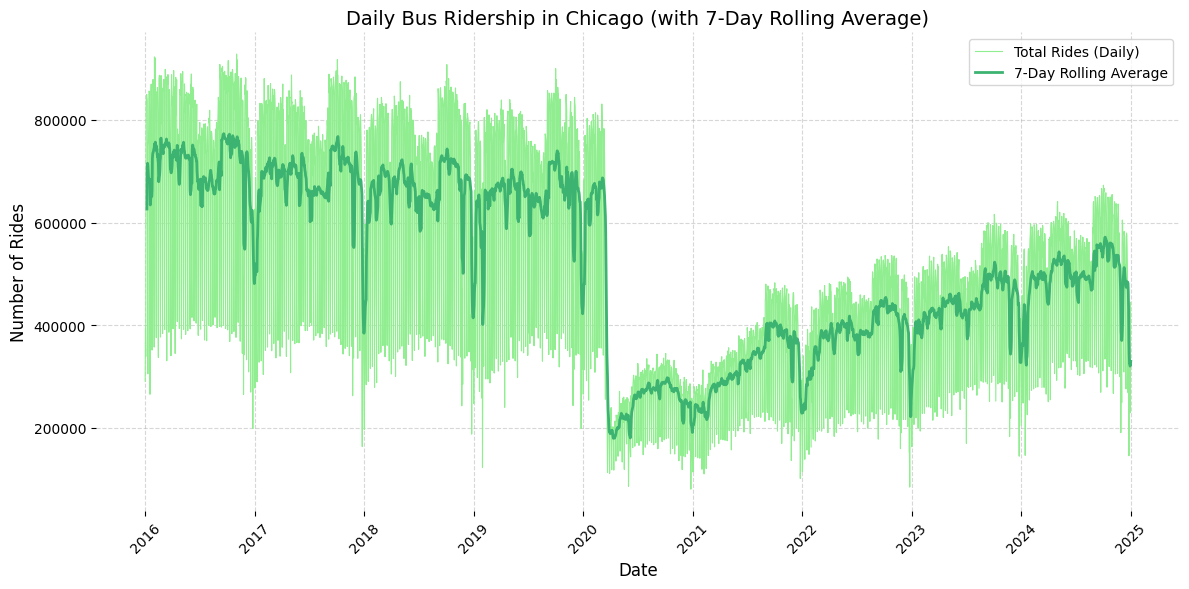

In [ ]:
#Compute 7-day rolling average
date_bus_summary_stats['rolling_avg'] = date_bus_summary_stats['total_rides'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))

#Plot original data (light line)
plt.plot(date_bus_summary_stats['date'], 
        date_bus_summary_stats['total_rides'], 
        label='Total Rides (Daily)', 
        color='lightgreen', 
        linewidth=0.8)

#Plot rolling average (bold line)
plt.plot(date_bus_summary_stats['date'], 
        date_bus_summary_stats['rolling_avg'], 
        label='7-Day Rolling Average', 
        color='mediumseagreen', 
        linewidth=2)

#Add axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Bus Ridership in Chicago (with 7-Day Rolling Average)', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

for spine in plt.gca().spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


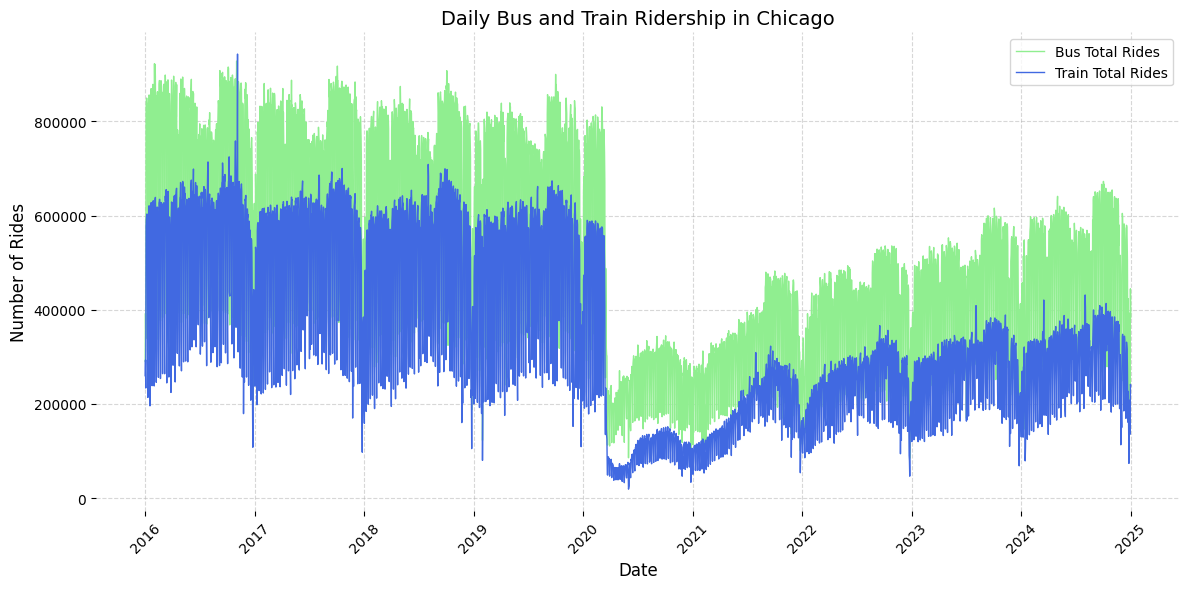

In [ ]:
#Plot the daily ridership data for bus and train
plt.figure(figsize=(12, 6))
plt.plot(date_bus_summary_stats['date'], 
        date_bus_summary_stats['total_rides'], 
        label='Bus Total Rides', 
        color='lightgreen', 
        linewidth=1)

plt.plot(daily_train_ridership['date'], 
        daily_train_ridership['total_rides'], 
        label='Train Total Rides', 
        color='royalblue', 
        linewidth=1)
#Axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Bus and Train Ridership in Chicago', fontsize=14)
#Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
#Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
#Clean up plot borders
for spine in plt.gca().spines.values():
        spine.set_visible(False)
plt.tight_layout()
plt.show()

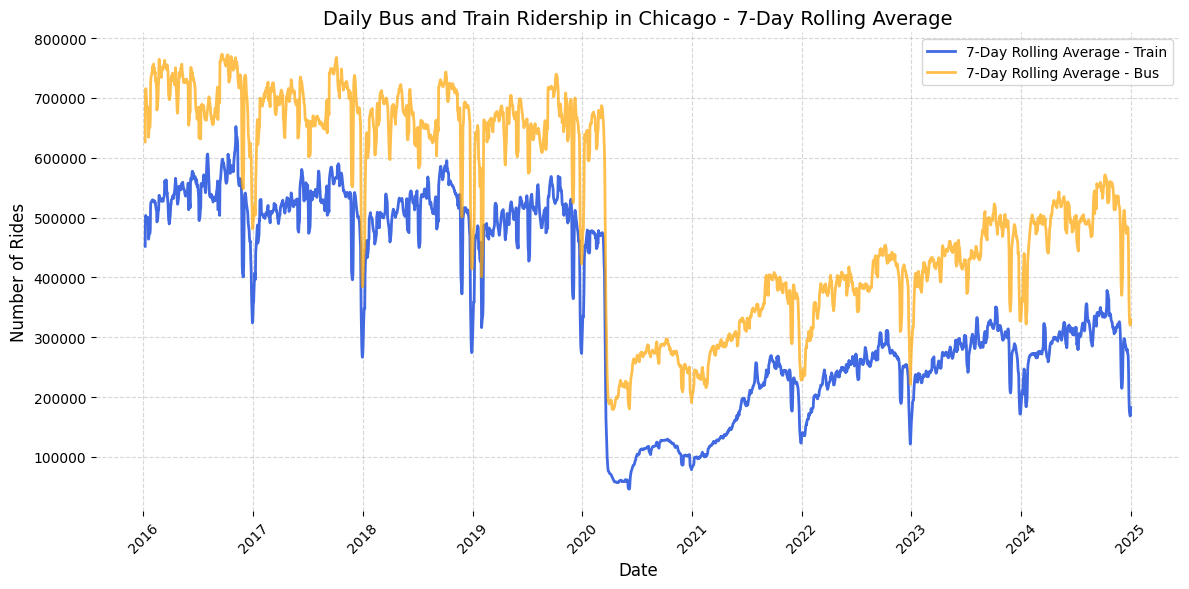

In [ ]:
#Plot the daily ridership data for bus and train with rolling average
plt.figure(figsize=(12, 6))
#Plot rolling average - Train (bold line)
plt.plot(daily_train_ridership['date'], 
        daily_train_ridership['rolling_avg'], 
        label='7-Day Rolling Average - Train', 
        color='royalblue', 
        linewidth=2)
#Plot rolling average - Bus (bold line)
plt.plot(date_bus_summary_stats['date'], 
        date_bus_summary_stats['rolling_avg'], 
        label='7-Day Rolling Average - Bus', 
        color='orange', 
        linewidth=2,
        alpha=0.7)

#Axis labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Daily Bus and Train Ridership in Chicago - 7-Day Rolling Average', fontsize=14)
#Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
#Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
#Clean up plot borders
for spine in plt.gca().spines.values():
        spine.set_visible(False)
plt.tight_layout()
plt.show()

## HW 4

#### LSTM Modeling

###